In [1]:
from background_detection import detect_background
from hypercube_data import *
import config
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob


In [2]:
#data = np.load(path)
#X, y = data['X'], data['y']



preffix = '/work/users/mi186veva/data/'
path = '2019_08_28_14_00_34_SpecCube.dat'


paths = glob.glob(os.path.join(preffix, '*.dat'))




/work/users/mi186veva/data/2019_09_04_12_43_40_SpecCube.dat
/work/users/mi186veva/data/2020_05_28_15_20_27_SpecCube.dat
/work/users/mi186veva/data/2019_07_12_11_15_49_SpecCube.dat
/work/users/mi186veva/data/2020_05_15_12_43_58_SpecCube.dat
/work/users/mi186veva/data/2020_05_13_19_30_26_SpecCube.dat
/work/users/mi186veva/data/2019_12_20_15_15_21_SpecCube.dat
/work/users/mi186veva/data/2019_12_09_14_32_17_SpecCube.dat
/work/users/mi186veva/data/2020_06_17_14_29_15_SpecCube.dat
/work/users/mi186veva/data/2020_04_01_14_23_24_SpecCube.dat
/work/users/mi186veva/data/2019_12_11_11_41_04_SpecCube.dat
/work/users/mi186veva/data/2020_01_02_14_26_54_SpecCube.dat
/work/users/mi186veva/data/2019_08_23_12_15_26_SpecCube.dat
/work/users/mi186veva/data/2020_06_23_15_23_26_SpecCube.dat
/work/users/mi186veva/data/2020_06_03_13_33_43_SpecCube.dat
/work/users/mi186veva/data/2020_02_13_18_05_51_SpecCube.dat
/work/users/mi186veva/data/2019_09_25_13_07_12_SpecCube.dat
/work/users/mi186veva/data/2019_10_25_16

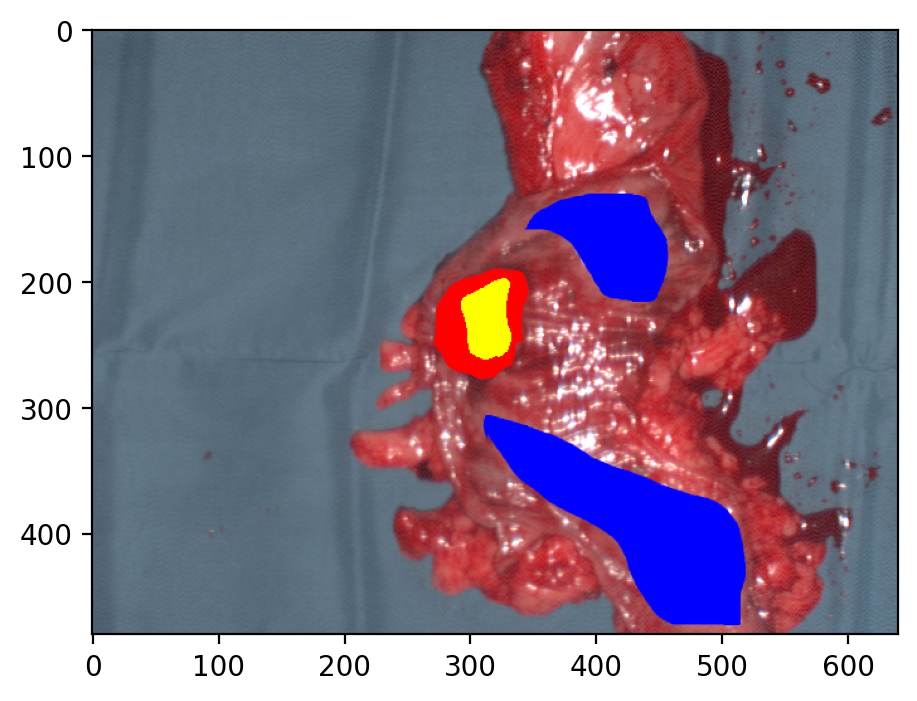

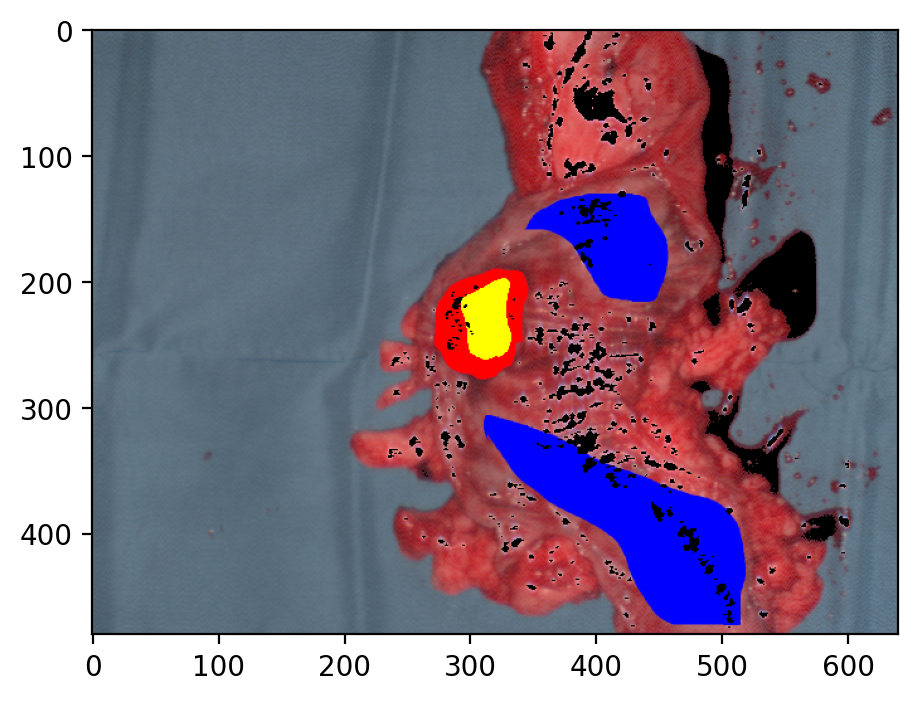

/work/users/mi186veva/data/2020_04_08_18_05_56_SpecCube.dat
/work/users/mi186veva/data/2019_07_25_11_56_38_SpecCube.dat
/work/users/mi186veva/data/2019_12_23_17_52_55_SpecCube.dat
/work/users/mi186veva/data/2020_06_24_18_00_12_SpecCube.dat
/work/users/mi186veva/data/2019_08_09_12_17_55_SpecCube.dat
/work/users/mi186veva/data/2020_01_29_18_12_15_SpecCube.dat
/work/users/mi186veva/data/2019_10_24_15_53_04_SpecCube.dat
/work/users/mi186veva/data/2020_03_27_11_31_09_SpecCube.dat
/work/users/mi186veva/data/2020_05_07_12_52_25_SpecCube.dat
/work/users/mi186veva/data/2019_09_30_20_50_43_SpecCube.dat
/work/users/mi186veva/data/2020_01_08_14_04_45_SpecCube.dat
/work/users/mi186veva/data/2020_02_04_20_48_03_SpecCube.dat
/work/users/mi186veva/data/2020_03_20_15_36_36_SpecCube.dat
/work/users/mi186veva/data/2020_01_06_11_52_11_SpecCube.dat
/work/users/mi186veva/data/2020_03_11_17_14_41_SpecCube.dat
/work/users/mi186veva/data/2020_05_20_12_06_41_SpecCube.dat
/work/users/mi186veva/data/2020_06_23_19

In [8]:
for path in paths:
    print(path)
    if '2019_07_17_15_38_14_SpecCube.dat' in path:
        image_path = path + '_Mask JW Kolo.png'
        mask = cv2.imread(image_path)[..., ::-1]

        cube, _ = Cube_Read(path, wavearea=config.WAVE_AREA, Firstnm=8, Lastnm=config.LAST_NM).cube_matrix()
        print(cube.shape)


        #gesund_indexes = np.where((mask[:, :, 0] == 0) & (mask[:, :, 1] == 0) & (mask[:, :, 2] == 255)) #blue
        #not_certain_indexes = np.where((mask[:, :, 0] == 255) & (mask[:, :, 1] == 0) & (mask[:, :, 2] == 0)) #red
        #ill_indexes = np.where((mask[:, :, 0] == 255) & (mask[:, :, 1] == 255) & (mask[:, :, 2] == 0)) #yellow

        gesund_indexes = (mask[:, :, 0] == 0) & (mask[:, :, 1] == 0) & (mask[:, :, 2] == 255) #blue
        not_certain_indexes = (mask[:, :, 0] == 255) & (mask[:, :, 1] == 0) & (mask[:, :, 2] == 0) #red
        ill_indexes = (mask[:, :, 0] == 255) & (mask[:, :, 1] == 255) & (mask[:, :, 2] == 0) #yellow

        print(gesund_indexes.shape)

        #cube = cube[gesund_indexes]
        #print(cube.shape)

        cube = np.reshape(np.array(cube), (640*480, cube.shape[2]))

        res = detect_background(cube)#, minWL=500 + config.FIRST_NM * 5, maxWL=500 + config.LAST_NM * 5, WLsteps=5, cube_index=None, bg_mask=None, scanning='horizontal')
        print(res.shape)
        res = np.reshape(res, (480, 640))
        #print(res.shape)
        print(res[res == 0].shape, res[res == 1].shape)

        plt.figure(dpi=200)
        plt.imshow(mask)
        plt.savefig('vortrag/with_background.png')
        plt.show()

        res_ = np.expand_dims(res, axis=-1)
        res_3d = np.concatenate([res_, res_, res_], axis=-1)
        #plt.imshow(res_, cmap='gray')
        #plt.show()

        #mask[gesund_indexes] *= res_3d

        mask_ = mask * res_3d
        plt.figure(dpi=200)
        plt.imshow(mask_)
        plt.savefig('vortrag/without_background.png')
        plt.show()


In [39]:
'''Function for an adding of bg_mask to the existing arrays'''

paths = glob.glob('/work/users/mi186veva/data_preprocessed/raw/*.npz')

for p in paths:
    print(p)
    data = np.load(p)
    X = data['X']
    #print(X.shape)
    bg_mask = detect_background(X).astype(np.bool)
    #print(np.unique(bg_mask))
    
    data = {n: a for n, a in data.items()}
    data['bg_mask'] = bg_mask
    
    np.savez(p, **{n: a for n, a in data.items()})
    
    data = np.load(p)
    #for key, value in data.items() :
    #    print (key)

/work/users/mi186veva/data_preprocessed/raw/2020_06_10_16_35_27_.npz
/work/users/mi186veva/data_preprocessed/raw/2020_06_23_19_23_37_.npz
/work/users/mi186veva/data_preprocessed/raw/2020_01_02_14_26_54_.npz
/work/users/mi186veva/data_preprocessed/raw/2019_09_04_12_43_40_.npz
/work/users/mi186veva/data_preprocessed/raw/2020_01_08_14_04_45_.npz
/work/users/mi186veva/data_preprocessed/raw/2019_07_12_11_15_49_.npz
/work/users/mi186veva/data_preprocessed/raw/2020_06_03_13_33_43_.npz
/work/users/mi186veva/data_preprocessed/raw/2019_12_09_14_32_17_.npz
/work/users/mi186veva/data_preprocessed/raw/2020_03_27_11_31_09_.npz
/work/users/mi186veva/data_preprocessed/raw/2019_07_25_11_56_38_.npz
/work/users/mi186veva/data_preprocessed/raw/2020_02_19_13_03_01_.npz
/work/users/mi186veva/data_preprocessed/raw/2020_05_15_12_43_58_.npz
/work/users/mi186veva/data_preprocessed/raw/2020_05_13_19_30_26_.npz
/work/users/mi186veva/data_preprocessed/raw/2020_05_07_12_52_25_.npz
/work/users/mi186veva/data_preproc

In [29]:
paths = glob.glob('/work/users/mi186veva/data_preprocessed/combi_with_raw_ill/shuffled/*.npz')

for p in paths:
    print(p)
    data = np.load(p)
    print(data['X'].shape[0])

/work/users/mi186veva/data_preprocessed/combi_with_raw_ill/shuffled/shuffled7.npz
82549
/work/users/mi186veva/data_preprocessed/combi_with_raw_ill/shuffled/shuffled0.npz
82309
/work/users/mi186veva/data_preprocessed/combi_with_raw_ill/shuffled/shuffled73.npz
82837
/work/users/mi186veva/data_preprocessed/combi_with_raw_ill/shuffled/shuffled74.npz
82546
/work/users/mi186veva/data_preprocessed/combi_with_raw_ill/shuffled/shuffled9.npz
83069
/work/users/mi186veva/data_preprocessed/combi_with_raw_ill/shuffled/shuffled90.npz
82566
/work/users/mi186veva/data_preprocessed/combi_with_raw_ill/shuffled/shuffled41.npz
82479
/work/users/mi186veva/data_preprocessed/combi_with_raw_ill/shuffled/shuffled97.npz
82701
/work/users/mi186veva/data_preprocessed/combi_with_raw_ill/shuffled/shuffled46.npz
82512
/work/users/mi186veva/data_preprocessed/combi_with_raw_ill/shuffled/shuffled34.npz
83146
/work/users/mi186veva/data_preprocessed/combi_with_raw_ill/shuffled/shuffled99.npz
82730
/work/users/mi186veva/da